<a href="https://colab.research.google.com/github/sinha-diksha/Natural_Disaster_Prediction/blob/main/hurricanes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing the necessary libraries and modules

# Importing pandas for data manipulation and analysis
# Importing numpy for numerical operations
# Importing the RandomForestRegressor class from the ensemble module of scikit-learn
# Importing the train_test_split function from the model_selection module of scikit-learn
# Importing the mean_squared_error and r2_score functions from the metrics module of scikit-learn
# Importing the OneHotEncoder class from the preprocessing module of scikit-learn
# Importing matplotlib.pyplot for data visualization
# Importing seaborn for statistical data visualization
# Importing re for regular expressions
# Importing datetime for working with dates and times
# Importing the RandomForestRegressor class from the ensemble module of scikit-learn
# Importing the train_test_split function from the model_selection module of scikit-learn
# Importing the mean_squared_error and r2_score functions from the metrics module of scikit-learn
# Importing the OneHotEncoder class from the preprocessing module of scikit-learn
# Importing warnings to handle warning messages
# Filtering out warning message
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")


In [4]:
import gdown # Importing the gdown library for downloading files from Google Drive

# Defining the URL of the dataset file on Google Drive
url = 'https://drive.google.com/file/d/14n5dHK49zm0UvQGCJGO14bD-ejO-GxF6/view?usp=share_link' #used the dataset pacific.csv
# Extracting the file ID from the URL
file_id = url.split('/')[-2]
# Constructing the download URL by appending the file ID to the base URL
gdown_url = f'https://drive.google.com/uc?id={file_id}'
# Downloading the dataset file and reading it into a pandas DataFrame
data = pd.read_csv(gdown_url)
print(data.head())

         ID                 Name      Date  Time Event Status Latitude  \
0  EP011949              UNNAMED  19490611     0           TS    20.2N   
1  EP011949              UNNAMED  19490611   600           TS    20.2N   
2  EP011949              UNNAMED  19490611  1200           TS    20.2N   
3  EP011949              UNNAMED  19490611  1800           TS    20.3N   
4  EP011949              UNNAMED  19490612     0           TS    20.4N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0    106.3W            45              -999  ...         -999         -999   
1    106.4W            45              -999  ...         -999         -999   
2    106.7W            45              -999  ...         -999         -999   
3    107.7W            45              -999  ...         -999         -999   
4    108.6W            45              -999  ...         -999         -999   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0        

In [5]:
# Convert date column as datetime.
data['Date'] = pd.to_datetime(data['Date'] , format= '%Y%m%d')

In [6]:
data

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,2015-11-29,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,2015-11-29,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


The function takes the coordinates as input and uses regular expression (re.findall()) to extract the hemisphere information by matching the first occurrence of 'N', 'S', 'W', or 'E' in the coordinates string. It then checks if the hemisphere is 'E' or 'N' and returns 0 for the Northern or Eastern hemisphere. Otherwise, it returns 1 for the Southern or Western hemisphere.

In [11]:
def hemisphere(coordinates):
        hemi = re.findall(r'[NSWE]' , coordinates)[0]
        if hemi == 'E' or hemi == 'N':
            return 0
        else:
            return 1

In [12]:
data

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,2015-11-29,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,2015-11-29,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Creating the column Latitude_Hemisphere.
data['Latitude_Hemisphere'] = data['Latitude'].apply(hemisphere)
data['Longitude_Hemisphere'] = data['Longitude'].apply(hemisphere)
# Converting the 'Latitude_Hemisphere' column to the 'category' data type
data['Latitude_Hemisphere'] = data['Latitude_Hemisphere'].astype('category')
# Converting the 'Longitude_Hemisphere' column to the 'category' data type
data['Longitude_Hemisphere'] = data['Longitude_Hemisphere'].astype('category')

In [14]:
data

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,1
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,1
26134,EP222015,SANDRA,2015-11-29,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,1
26135,EP222015,SANDRA,2015-11-29,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# Convert the latitude and longitude Column to numeric type.
data['Latitude'] =  data['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
data['Longitude'] =   data['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])

In [16]:
data

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2,106.3,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2,106.4,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2,106.7,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3,107.7,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4,108.6,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7,109.0,35,1002,...,0,0,0,0,0,0,0,0,0,1
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4,108.7,30,1007,...,0,0,0,0,0,0,0,0,0,1
26134,EP222015,SANDRA,2015-11-29,0,,LO,23.1,108.3,30,1008,...,0,0,0,0,0,0,0,0,0,1
26135,EP222015,SANDRA,2015-11-29,600,,LO,23.5,107.9,25,1009,...,0,0,0,0,0,0,0,0,0,1


In [17]:
# The missing values are given by -999. So , we need to fill them appropriately.

# Show the count of missing values and fill them with mean.
for column in data.columns:
    missing_cnt = data[column][data[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
#         print('in ' , column)
        mean = round(data[column][data[column] != -999 ].mean())
#         print("mean",mean)
        index = data.loc[data[column] == -999 , column].index
#         print("index" , index )
        data.loc[data[column] == -999 , column] = mean
#         print(df.loc[index , column])

Missing Values in column ID =  0
Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Time =  0
Missing Values in column Event =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0
Missing Values in column Minimum Pressure =  12804
Missing Values in column Low Wind NE =  19750
Missing Values in column Low Wind SE =  19750
Missing Values in column Low Wind SW =  19750
Missing Values in column Low Wind NW =  19750
Missing Values in column Moderate Wind NE =  19750
Missing Values in column Moderate Wind SE =  19750
Missing Values in column Moderate Wind SW =  19750
Missing Values in column Moderate Wind NW =  19750
Missing Values in column High Wind NE =  19750
Missing Values in column High Wind SE =  19750
Missing Values in column High Wind SW =  19750
Missing Values in column High Wind NW =  19750
Missing Values in column Latitude_Hemisp

In [19]:
# Restructure the dataframe for visibility and remove columns ID and Event.
data =  data[['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Latitude_Hemisphere' ,
       'Longitude', 'Longitude_Hemisphere' ,'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']]

In [20]:
data

,ID,Name,Date,Time,Event,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2,0,106.3,1,...,27,35,13,11,9,11,5,4,3,5
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2,0,106.4,1,...,27,35,13,11,9,11,5,4,3,5
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2,0,106.7,1,...,27,35,13,11,9,11,5,4,3,5
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3,0,107.7,1,...,27,35,13,11,9,11,5,4,3,5
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4,0,108.6,1,...,27,35,13,11,9,11,5,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7,0,109.0,1,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4,0,108.7,1,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,2015-11-29,0,,LO,23.1,0,108.3,1,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,2015-11-29,600,,LO,23.5,0,107.9,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Change all time to format HHMM.
data['Time'] = data['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t

In [23]:
# Apply the function.
data['Time'] = data['Time'].apply(hhmm)

In [24]:
data

,ID,Name,Date,Time,Event,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,1949-06-11,0000,,TS,20.2,0,106.3,1,...,27,35,13,11,9,11,5,4,3,5
1,EP011949,UNNAMED,1949-06-11,0600,,TS,20.2,0,106.4,1,...,27,35,13,11,9,11,5,4,3,5
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2,0,106.7,1,...,27,35,13,11,9,11,5,4,3,5
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3,0,107.7,1,...,27,35,13,11,9,11,5,4,3,5
4,EP011949,UNNAMED,1949-06-12,0000,,TS,20.4,0,108.6,1,...,27,35,13,11,9,11,5,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7,0,109.0,1,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4,0,108.7,1,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,2015-11-29,0000,,LO,23.1,0,108.3,1,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,2015-11-29,0600,,LO,23.5,0,107.9,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Convert the column into Datetime.
data['Time'] = pd.to_datetime(data['Time'] , format='%H%M').dt.time

In [27]:
# Convert the status column to categorical.
data['Status'] = data['Status'].astype('category')

data = data.drop(columns = ['ID' , 'Event'])

In [30]:
data.head(10)

,Name,Date,Time,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,UNNAMED,1949-06-11,00:00:00,TS,20.2,0,106.3,1,45,995,...,27,35,13,11,9,11,5,4,3,5
1,UNNAMED,1949-06-11,06:00:00,TS,20.2,0,106.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
2,UNNAMED,1949-06-11,12:00:00,TS,20.2,0,106.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
3,UNNAMED,1949-06-11,18:00:00,TS,20.3,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
4,UNNAMED,1949-06-12,00:00:00,TS,20.4,0,108.6,1,45,995,...,27,35,13,11,9,11,5,4,3,5
5,UNNAMED,1949-06-12,06:00:00,TS,20.5,0,109.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
6,UNNAMED,1949-06-12,12:00:00,TS,20.6,0,110.2,1,45,995,...,27,35,13,11,9,11,5,4,3,5
7,UNNAMED,1949-06-17,12:00:00,TS,14.1,0,107.0,1,45,995,...,27,35,13,11,9,11,5,4,3,5
8,UNNAMED,1949-06-17,18:00:00,TS,14.6,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
9,UNNAMED,1949-06-18,00:00:00,TS,15.0,0,108.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5


We are finding the top 10 cyclones that has occured the maximum number of time:

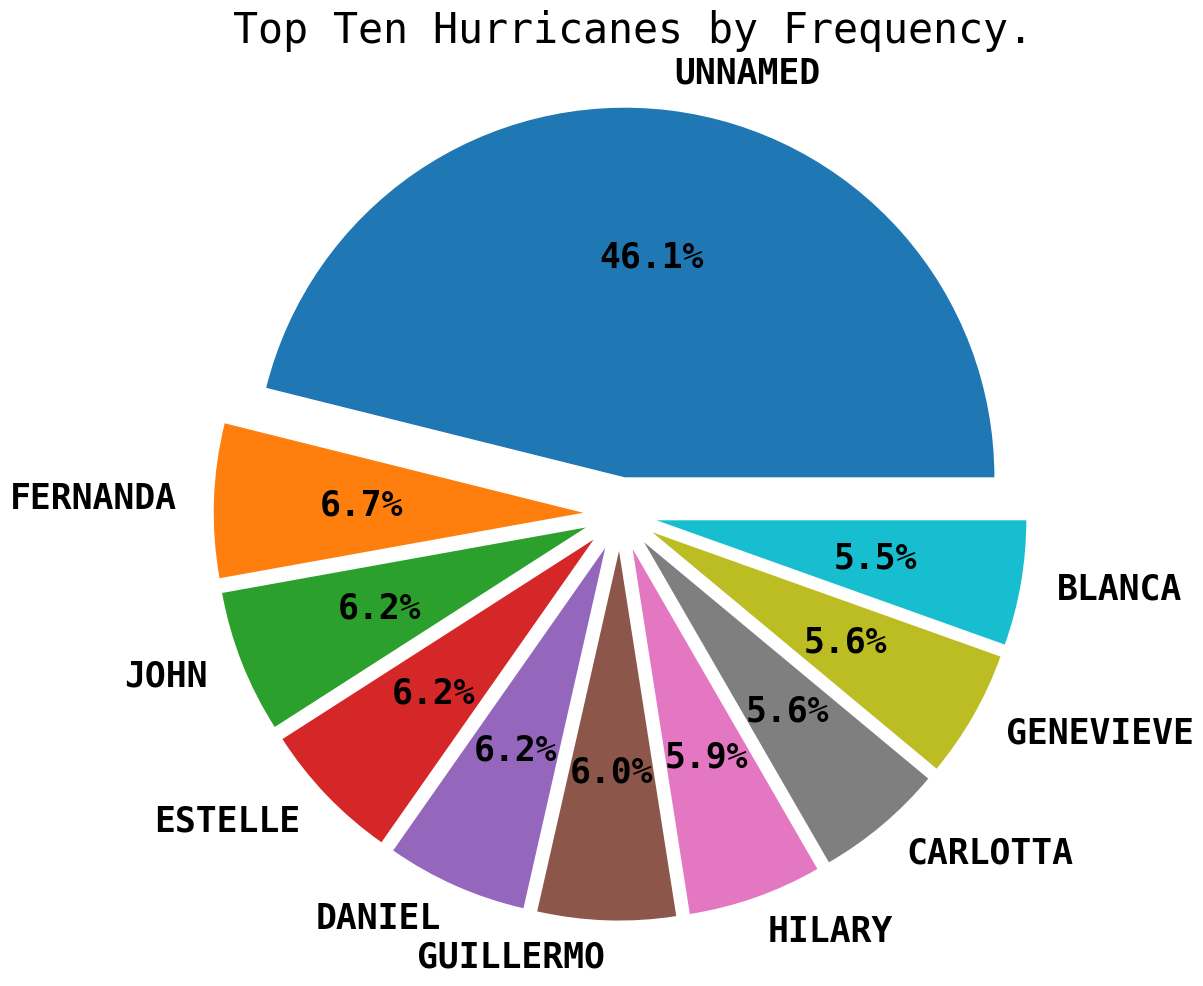

In [34]:
topTen = [x.strip() for x in data.groupby('Name').count().sort_values(by = 'Date' , ascending = False).index[:10]]
val = data.groupby('Name').count().sort_values(by = 'Date' , ascending = False)[:10]['Date'].values
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 25}
plt.rc('font', **font)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  labels = topTen , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(10)])
plt.title(' Top Ten Hurricanes by Frequency.' , fontsize = 30)
plt.show()

Finding the frequency of Hurricanes by month


Text(0.5, 1.0, 'Frequency of Cyclones by Month.')

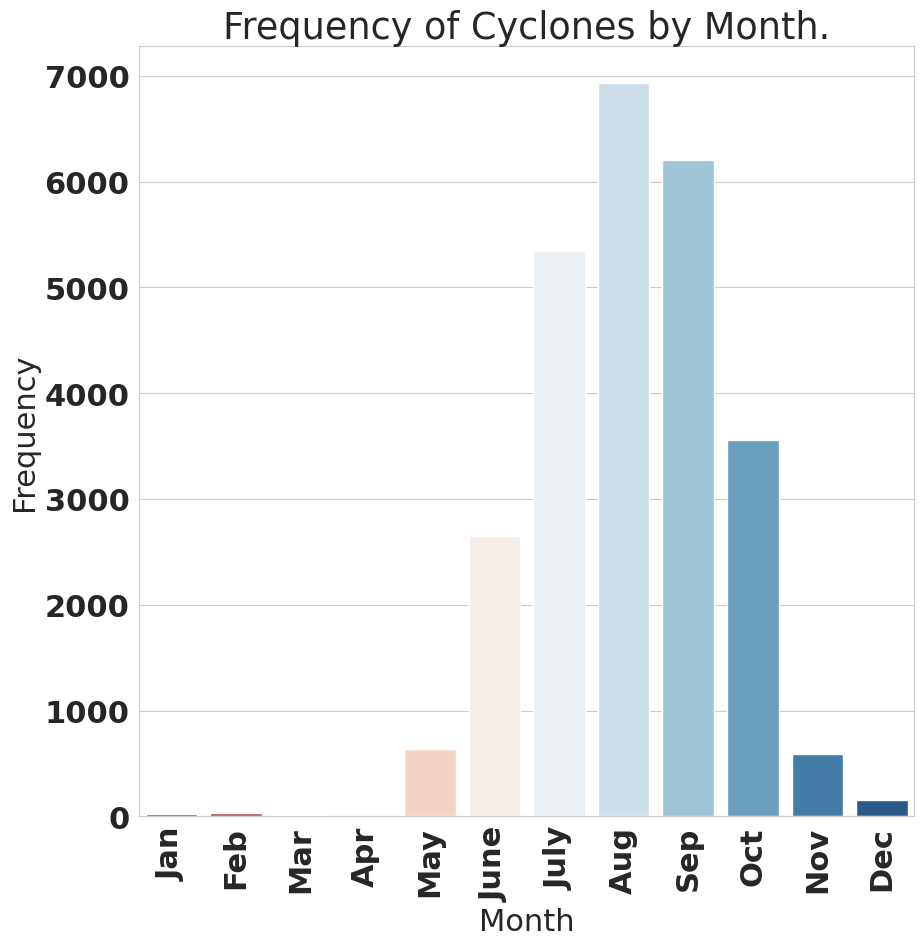

In [35]:
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Year'] = data['Date'].apply(lambda x: x.year)
mnt = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = data.groupby('Month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'Month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequency')
plt.title('Frequency of Cyclones by Month.')

yearwise frequency of hurricanes

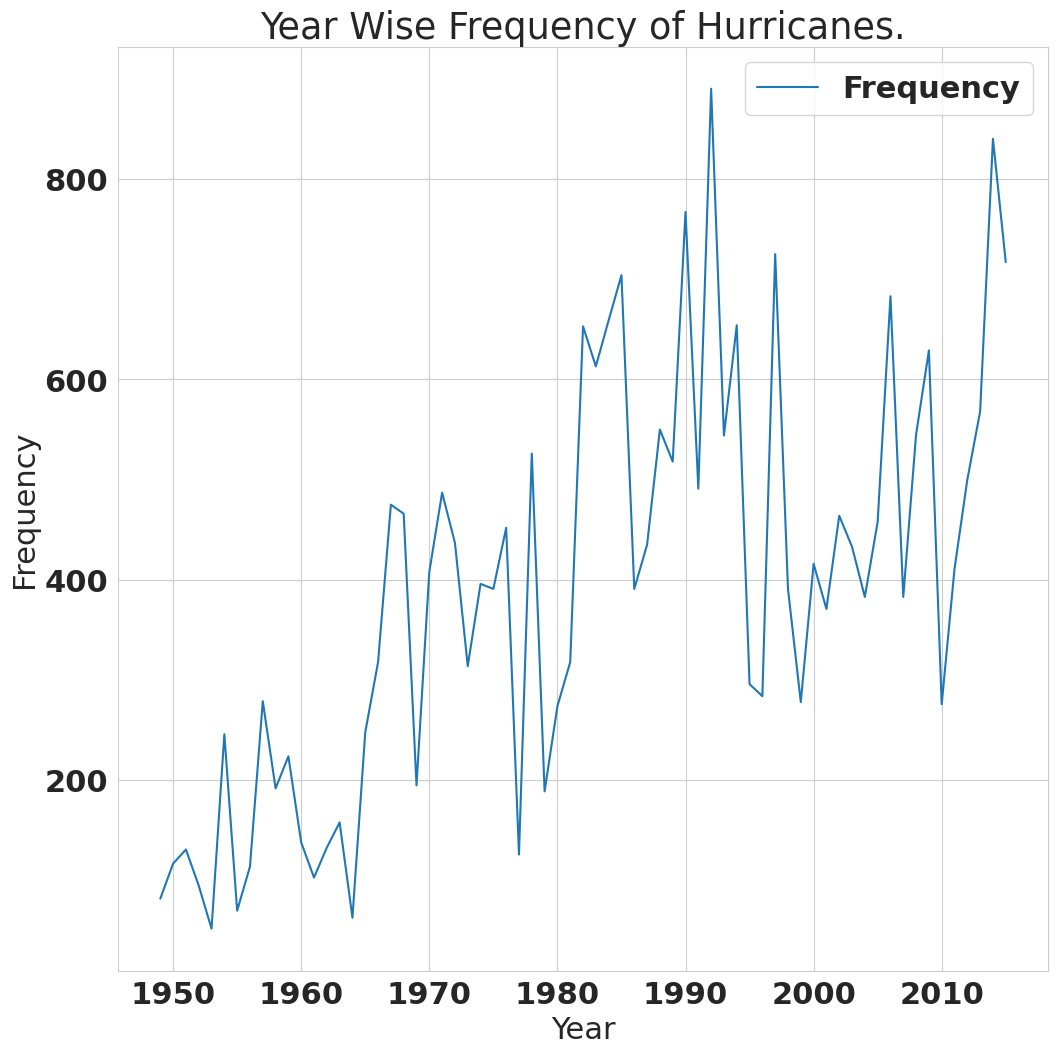

In [36]:
# Year-Wise Frequency of Hurricanes.
temp = data.groupby('Year').count().sort_values(by = 'Month' , ascending = False)
plt.figure(figsize= (12,12))
sns.lineplot(x = temp.index , y = 'Month' , data = temp , label = 'Frequency')
plt.ylabel('Frequency')
plt.title('Year Wise Frequency of Hurricanes.')
plt.show()

<Axes: xlabel='Probability Distribution of Frequency of Cyclones.', ylabel='Density'>

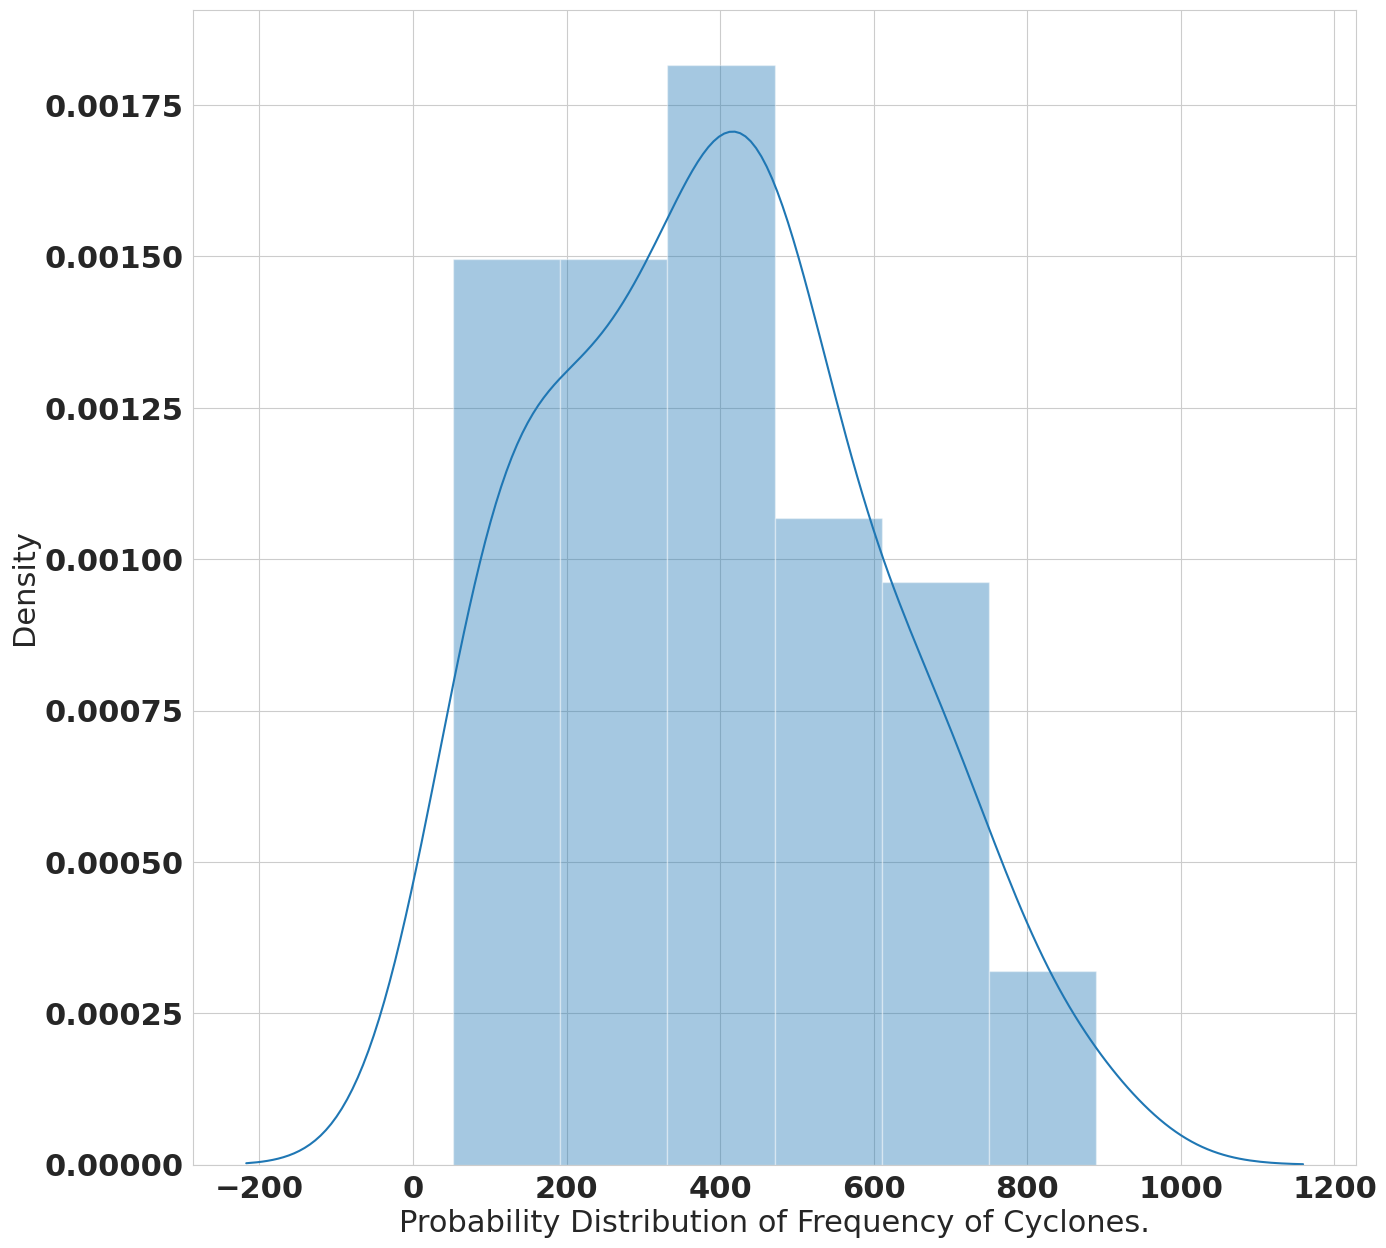

In [37]:
# Probability Distribution Function of Frequency.
temp = data.groupby('Year').count().sort_values(by = 'Date' , ascending = False)
plt.figure(figsize=(15,15))
sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')

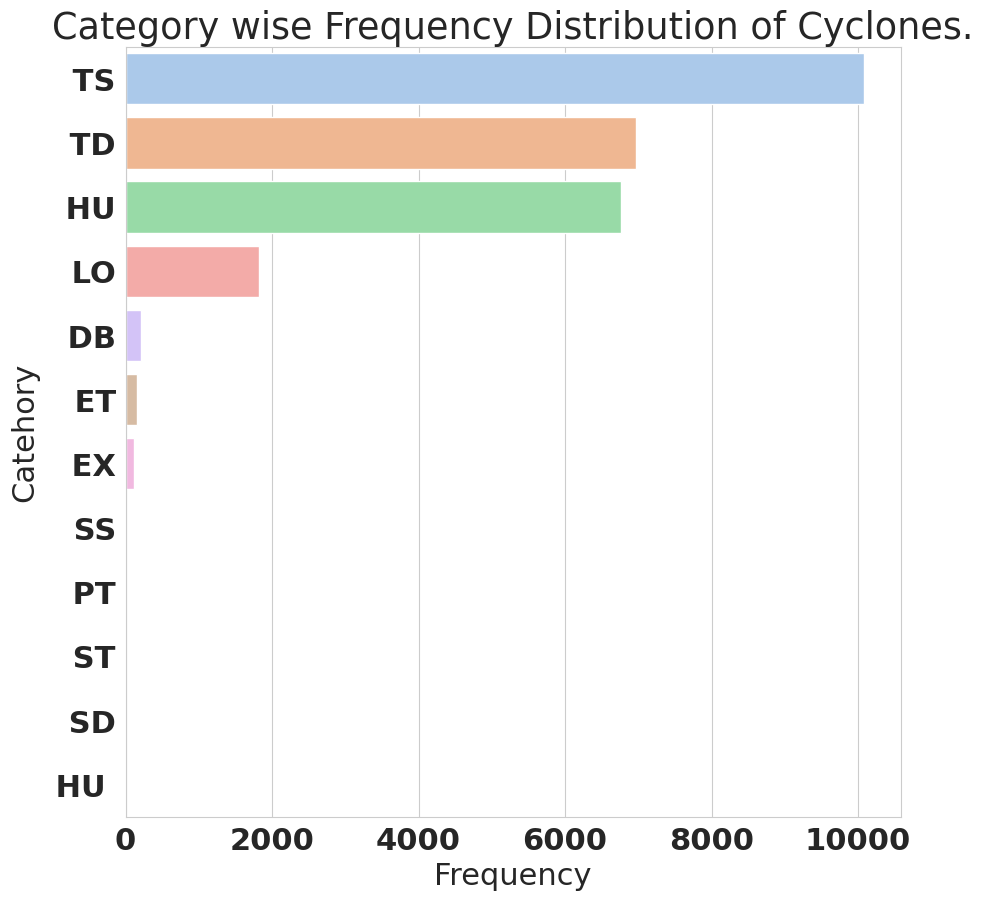

In [40]:
## Frequency of Cyclones by Category
# TD – Tropical cyclone of tropical depression intensity (< 34 knots)
# TS – Tropical cyclone of tropical storm intensity (34-63 knots)
# HU – Tropical cyclone of hurricane intensity (> 64 knots)
# EX – Extratropical cyclone (of any intensity)
# SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
# SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
# LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
# WV – Tropical Wave (of any intensity)
# DB – Disturbance (of any intensity)
temp = data.groupby('Status').count().sort_values(by = 'Date' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(y = list(temp.index) , x = 'Date' , data = temp, palette= 'pastel' )
plt.xlabel('Frequency')
plt.ylabel('Catehory')
plt.title('Category wise Frequency Distribution of Cyclones.')
plt.show()

In [50]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.metrics import precision_score


Using Decision Tree



In [51]:
# Import Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

# Import train-test split.
from sklearn.model_selection import train_test_split

# Import accuracy Score.
from sklearn.metrics import accuracy_score

#Import Recall Score.
from sklearn.metrics import recall_score

#Import Precision Score.
from sklearn.metrics import precision_score

# Form the model.
dt = DecisionTreeClassifier(min_samples_leaf=50 , criterion='entropy')


# Set the dependent and independent variables.
x_train = data[['Latitude', 'Latitude_Hemisphere',
       'Longitude', 'Longitude_Hemisphere', 'Maximum Wind', 'Minimum Pressure',
       'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
       'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW',
       'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW',
       'High Wind NW' , 'Month' , 'Year']]
y_train = data['Status']


# Perform the Kfold validation.

# Import the KFold library.
from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )
# Lists to store the scores for each fold
dt_scores = []
dt_recall_scores = []
dt_precision_scores = []
# Looping over the folds using the indices generated by kf.split(x_train)
for tr , ts in kf.split(x_train):
  # Splitting the training and test data for the current fold
    xtr = x_train.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_train.loc[ts]
    yts = y_train.loc[ts]
    dt.fit(xtr , ytr)  # Fitting the decision tree classifier on the training data
    y_pred = dt.predict(xts)  # Predicting the labels for the test data
    dt_scores.append(accuracy_score(yts, y_pred)) # Computing and storing the accuracy score for the current fold
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted')) # Computing and storing the recall score for the current fold
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted')) # Computing and storing the precision score for the current fold
# dt.fit(x_train, y_train)
# y_pred = dt.predict(x_test)
# accuracy_score(y_test, y_pred)
dt_scr = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('Accuracy score for Decision Tree is :' , dt_scr['accuracy'])
print('Recall score for Decision Tree is :' , dt_scr['recall'])
print('Precision score for Decision Tree is :' , dt_scr['precision'])

Accuracy score for Decision Tree is : 0.9651068271145011
Recall score for Decision Tree is : 0.9651068271145011
Precision score for Decision Tree is : 0.9639969870825983
